In [1]:
# Library data manipulation
import pandas as pd

!pip install pandasql
from pandasql import sqldf as ps

import io

# Library Data Visualization
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=5ac0a6f6d7ac607348a232d4947cd8c192ffc2880d0668d0193673097a705b4f
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [2]:
from google.colab import files
dataset_test = files.upload()

Saving Test.csv to Test.csv


In [3]:
df = pd.read_csv('Test.csv')

In [4]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male


In [5]:
from google.colab import files
dataset_train = files.upload()

Saving Train.csv to Train.csv


In [6]:
df2 = pd.read_csv('Train.csv')

In [7]:
df2.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


Detecting Missing Values

In [8]:
df.isna().sum() / len(df)

Loan_ID                    0.000000
Loan_Amount_Requested      0.000000
Length_Employed            0.045061
Home_Owner                 0.152555
Annual_Income              0.154262
Income_Verified            0.000000
Purpose_Of_Loan            0.000000
Debt_To_Income             0.000000
Inquiries_Last_6Mo         0.000000
Months_Since_Deliquency    0.537324
Number_Open_Accounts       0.000000
Total_Accounts             0.000000
Gender                     0.000000
dtype: float64

In [9]:
df2.isna().sum() / len(df2)

Loan_ID                    0.000000
Loan_Amount_Requested      0.000000
Length_Employed            0.044861
Home_Owner                 0.154276
Annual_Income              0.152773
Income_Verified            0.000000
Purpose_Of_Loan            0.000000
Debt_To_Income             0.000000
Inquiries_Last_6Mo         0.000000
Months_Since_Deliquency    0.537883
Number_Open_Accounts       0.000000
Total_Accounts             0.000000
Gender                     0.000000
Interest_Rate              0.000000
dtype: float64

Dealing with Missing Data

In [10]:
df = df.dropna()
df

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male
8,10164318,"24,625",10+ years,Mortgage,56000.0,VERIFIED - income source,debt_consolidation,10.93,0,18.0,6,25,Male
11,10164321,"28,000",2 years,Mortgage,95000.0,not verified,other,15.11,0,22.0,14,38,Male
19,10164329,"11,000",6 years,Rent,36000.0,VERIFIED - income,debt_consolidation,28.13,1,65.0,10,15,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109522,10273832,"18,000",10+ years,Rent,51000.0,VERIFIED - income source,debt_consolidation,19.88,0,12.0,6,23,Male
109528,10273838,"16,150",9 years,Rent,36000.0,VERIFIED - income,debt_consolidation,26.70,0,16.0,5,40,Male
109536,10273846,"15,000",9 years,Mortgage,120000.0,VERIFIED - income,other,8.15,2,32.0,13,57,Male
109537,10273847,"9,600",10+ years,Mortgage,125000.0,not verified,credit_card,9.08,1,17.0,9,34,Male


In [11]:
df2 = df2.dropna()
df2

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
7,10000008,"15,000",< 1 year,Rent,115000.0,VERIFIED - income,debt_consolidation,7.97,1,16.0,25,31,Female,2
12,10000013,"7,200",10+ years,Rent,55000.0,VERIFIED - income source,debt_consolidation,31.25,0,68.0,5,16,Male,2
14,10000015,"6,700",10+ years,Mortgage,16000.0,VERIFIED - income source,credit_card,14.70,0,13.0,20,43,Male,2
18,10000019,"25,000",10+ years,Rent,62000.0,VERIFIED - income,credit_card,13.72,0,64.0,6,26,Female,3
20,10000021,"4,000",10+ years,Rent,55000.0,not verified,credit_card,23.04,0,10.0,15,21,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164285,10164286,"7,200",6 years,Mortgage,65000.0,not verified,debt_consolidation,8.17,1,27.0,8,28,Female,2
164287,10164288,"25,000",10+ years,Mortgage,66000.0,VERIFIED - income source,debt_consolidation,17.15,0,10.0,15,26,Male,3
164288,10164289,"6,000",2 years,Rent,30000.0,not verified,credit_card,15.84,0,28.0,9,17,Female,2
164300,10164301,"24,000",1 year,Rent,108000.0,VERIFIED - income source,other,14.30,0,22.0,12,36,Female,3


<Axes: >

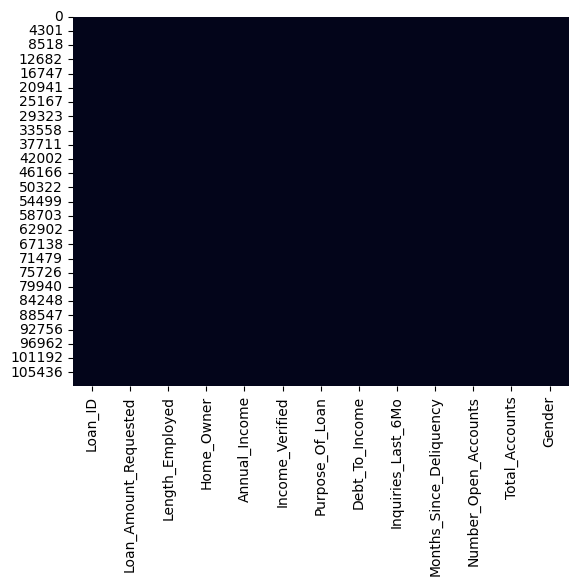

In [12]:
sns.heatmap(df.isnull(), cbar = False)

<Axes: >

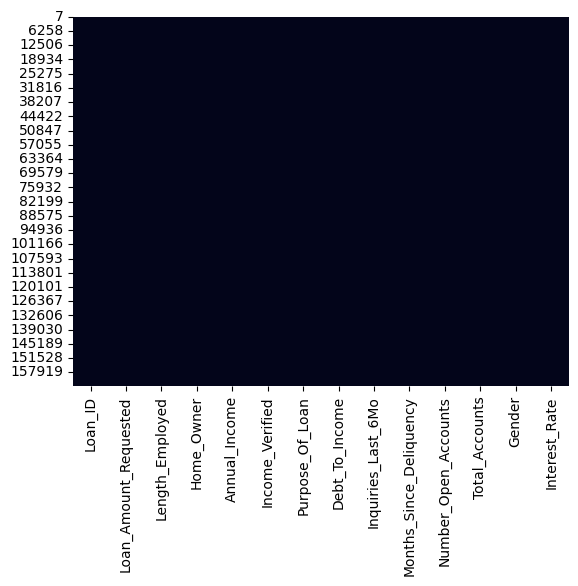

In [13]:
sns.heatmap(df2.isnull(), cbar = False)

Remove Duplicate Data

In [14]:
df = df.drop_duplicates()
df

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male
8,10164318,"24,625",10+ years,Mortgage,56000.0,VERIFIED - income source,debt_consolidation,10.93,0,18.0,6,25,Male
11,10164321,"28,000",2 years,Mortgage,95000.0,not verified,other,15.11,0,22.0,14,38,Male
19,10164329,"11,000",6 years,Rent,36000.0,VERIFIED - income,debt_consolidation,28.13,1,65.0,10,15,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109522,10273832,"18,000",10+ years,Rent,51000.0,VERIFIED - income source,debt_consolidation,19.88,0,12.0,6,23,Male
109528,10273838,"16,150",9 years,Rent,36000.0,VERIFIED - income,debt_consolidation,26.70,0,16.0,5,40,Male
109536,10273846,"15,000",9 years,Mortgage,120000.0,VERIFIED - income,other,8.15,2,32.0,13,57,Male
109537,10273847,"9,600",10+ years,Mortgage,125000.0,not verified,credit_card,9.08,1,17.0,9,34,Male


In [15]:
df2 = df2.drop_duplicates()
df2

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
7,10000008,"15,000",< 1 year,Rent,115000.0,VERIFIED - income,debt_consolidation,7.97,1,16.0,25,31,Female,2
12,10000013,"7,200",10+ years,Rent,55000.0,VERIFIED - income source,debt_consolidation,31.25,0,68.0,5,16,Male,2
14,10000015,"6,700",10+ years,Mortgage,16000.0,VERIFIED - income source,credit_card,14.70,0,13.0,20,43,Male,2
18,10000019,"25,000",10+ years,Rent,62000.0,VERIFIED - income,credit_card,13.72,0,64.0,6,26,Female,3
20,10000021,"4,000",10+ years,Rent,55000.0,not verified,credit_card,23.04,0,10.0,15,21,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164285,10164286,"7,200",6 years,Mortgage,65000.0,not verified,debt_consolidation,8.17,1,27.0,8,28,Female,2
164287,10164288,"25,000",10+ years,Mortgage,66000.0,VERIFIED - income source,debt_consolidation,17.15,0,10.0,15,26,Male,3
164288,10164289,"6,000",2 years,Rent,30000.0,not verified,credit_card,15.84,0,28.0,9,17,Female,2
164300,10164301,"24,000",1 year,Rent,108000.0,VERIFIED - income source,other,14.30,0,22.0,12,36,Female,3


Merge Data

In [16]:
df

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male
8,10164318,"24,625",10+ years,Mortgage,56000.0,VERIFIED - income source,debt_consolidation,10.93,0,18.0,6,25,Male
11,10164321,"28,000",2 years,Mortgage,95000.0,not verified,other,15.11,0,22.0,14,38,Male
19,10164329,"11,000",6 years,Rent,36000.0,VERIFIED - income,debt_consolidation,28.13,1,65.0,10,15,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109522,10273832,"18,000",10+ years,Rent,51000.0,VERIFIED - income source,debt_consolidation,19.88,0,12.0,6,23,Male
109528,10273838,"16,150",9 years,Rent,36000.0,VERIFIED - income,debt_consolidation,26.70,0,16.0,5,40,Male
109536,10273846,"15,000",9 years,Mortgage,120000.0,VERIFIED - income,other,8.15,2,32.0,13,57,Male
109537,10273847,"9,600",10+ years,Mortgage,125000.0,not verified,credit_card,9.08,1,17.0,9,34,Male


In [17]:
df2

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
7,10000008,"15,000",< 1 year,Rent,115000.0,VERIFIED - income,debt_consolidation,7.97,1,16.0,25,31,Female,2
12,10000013,"7,200",10+ years,Rent,55000.0,VERIFIED - income source,debt_consolidation,31.25,0,68.0,5,16,Male,2
14,10000015,"6,700",10+ years,Mortgage,16000.0,VERIFIED - income source,credit_card,14.70,0,13.0,20,43,Male,2
18,10000019,"25,000",10+ years,Rent,62000.0,VERIFIED - income,credit_card,13.72,0,64.0,6,26,Female,3
20,10000021,"4,000",10+ years,Rent,55000.0,not verified,credit_card,23.04,0,10.0,15,21,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164285,10164286,"7,200",6 years,Mortgage,65000.0,not verified,debt_consolidation,8.17,1,27.0,8,28,Female,2
164287,10164288,"25,000",10+ years,Mortgage,66000.0,VERIFIED - income source,debt_consolidation,17.15,0,10.0,15,26,Male,3
164288,10164289,"6,000",2 years,Rent,30000.0,not verified,credit_card,15.84,0,28.0,9,17,Female,2
164300,10164301,"24,000",1 year,Rent,108000.0,VERIFIED - income source,other,14.30,0,22.0,12,36,Female,3


In [18]:
dataset = pd.merge(df, df2, left_index=True, right_index=True, how='outer')
dataset

,Loan_ID_x,Loan_Amount_Requested_x,Length_Employed_x,Home_Owner_x,Annual_Income_x,Income_Verified_x,Purpose_Of_Loan_x,Debt_To_Income_x,Inquiries_Last_6Mo_x,Months_Since_Deliquency_x,...,Annual_Income_y,Income_Verified_y,Purpose_Of_Loan_y,Debt_To_Income_y,Inquiries_Last_6Mo_y,Months_Since_Deliquency_y,Number_Open_Accounts_y,Total_Accounts_y,Gender_y,Interest_Rate
0,10164310.0,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10164314.0,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,115000.0,VERIFIED - income,debt_consolidation,7.97,1.0,16.0,25.0,31.0,Female,2.0
8,10164318.0,"24,625",10+ years,Mortgage,56000.0,VERIFIED - income source,debt_consolidation,10.93,0.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,10164321.0,"28,000",2 years,Mortgage,95000.0,not verified,other,15.11,0.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65000.0,not verified,debt_consolidation,8.17,1.0,27.0,8.0,28.0,Female,2.0
164287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66000.0,VERIFIED - income source,debt_consolidation,17.15,0.0,10.0,15.0,26.0,Male,3.0
164288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30000.0,not verified,credit_card,15.84,0.0,28.0,9.0,17.0,Female,2.0
164300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,108000.0,VERIFIED - income source,other,14.30,0.0,22.0,12.0,36.0,Female,3.0


In [19]:
dataset = pd.merge(df, df2, left_index=True, right_index=True)
dataset

,Loan_ID_x,Loan_Amount_Requested_x,Length_Employed_x,Home_Owner_x,Annual_Income_x,Income_Verified_x,Purpose_Of_Loan_x,Debt_To_Income_x,Inquiries_Last_6Mo_x,Months_Since_Deliquency_x,...,Annual_Income_y,Income_Verified_y,Purpose_Of_Loan_y,Debt_To_Income_y,Inquiries_Last_6Mo_y,Months_Since_Deliquency_y,Number_Open_Accounts_y,Total_Accounts_y,Gender_y,Interest_Rate
41,10164351,"13,250",4 years,Other,36000.0,VERIFIED - income,credit_card,31.77,1,69.0,...,50000.0,not verified,debt_consolidation,15.72,0,41.0,9,18,Male,2
45,10164355,"16,000",10+ years,Own,70000.0,VERIFIED - income,debt_consolidation,24.59,1,66.0,...,60000.0,VERIFIED - income source,debt_consolidation,10.30,0,21.0,5,15,Male,2
46,10164356,"4,200",7 years,Mortgage,50000.0,not verified,debt_consolidation,12.17,1,25.0,...,102000.0,VERIFIED - income source,small_business,20.19,0,12.0,11,21,Female,3
49,10164359,"6,825",2 years,Mortgage,47000.0,VERIFIED - income source,debt_consolidation,27.50,0,52.0,...,70000.0,VERIFIED - income,credit_card,20.42,0,3.0,10,26,Female,3
54,10164364,"5,000",6 years,Own,30900.0,not verified,debt_consolidation,17.51,2,60.0,...,55000.0,not verified,debt_consolidation,19.07,1,53.0,15,29,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109462,10273772,"14,000",8 years,Own,37200.0,not verified,debt_consolidation,7.45,0,68.0,...,60000.0,VERIFIED - income source,debt_consolidation,15.80,0,35.0,11,24,Male,3
109464,10273774,"27,525",10+ years,Rent,100000.0,VERIFIED - income source,debt_consolidation,27.50,0,34.0,...,14800.0,not verified,debt_consolidation,22.87,1,10.0,6,9,Male,2
109473,10273783,"10,000",2 years,Rent,63000.0,VERIFIED - income source,home_improvement,9.82,0,80.0,...,110000.0,VERIFIED - income,debt_consolidation,15.96,1,40.0,20,31,Male,3
109491,10273801,"24,000",< 1 year,Mortgage,127000.0,VERIFIED - income source,home_improvement,3.33,0,15.0,...,100000.0,VERIFIED - income,debt_consolidation,5.21,3,20.0,16,40,Female,1


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11061 entries, 41 to 109528
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan_ID_x                  11061 non-null  int64  
 1   Loan_Amount_Requested_x    11061 non-null  object 
 2   Length_Employed_x          11061 non-null  object 
 3   Home_Owner_x               11061 non-null  object 
 4   Annual_Income_x            11061 non-null  float64
 5   Income_Verified_x          11061 non-null  object 
 6   Purpose_Of_Loan_x          11061 non-null  object 
 7   Debt_To_Income_x           11061 non-null  float64
 8   Inquiries_Last_6Mo_x       11061 non-null  int64  
 9   Months_Since_Deliquency_x  11061 non-null  float64
 10  Number_Open_Accounts_x     11061 non-null  int64  
 11  Total_Accounts_x           11061 non-null  int64  
 12  Gender_x                   11061 non-null  object 
 13  Loan_ID_y                  11061 non-null  i

Reprocessing Data

In [21]:
df.isnull().sum()

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
dtype: int64

In [22]:
df2.isnull().sum()

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
dtype: int64

In [23]:
dataset.isnull().sum()

Loan_ID_x                    0
Loan_Amount_Requested_x      0
Length_Employed_x            0
Home_Owner_x                 0
Annual_Income_x              0
Income_Verified_x            0
Purpose_Of_Loan_x            0
Debt_To_Income_x             0
Inquiries_Last_6Mo_x         0
Months_Since_Deliquency_x    0
Number_Open_Accounts_x       0
Total_Accounts_x             0
Gender_x                     0
Loan_ID_y                    0
Loan_Amount_Requested_y      0
Length_Employed_y            0
Home_Owner_y                 0
Annual_Income_y              0
Income_Verified_y            0
Purpose_Of_Loan_y            0
Debt_To_Income_y             0
Inquiries_Last_6Mo_y         0
Months_Since_Deliquency_y    0
Number_Open_Accounts_y       0
Total_Accounts_y             0
Gender_y                     0
Interest_Rate                0
dtype: int64

In [24]:
df.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
dtype: object

In [25]:
df2.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

In [26]:
dataset.dtypes

Loan_ID_x                      int64
Loan_Amount_Requested_x       object
Length_Employed_x             object
Home_Owner_x                  object
Annual_Income_x              float64
Income_Verified_x             object
Purpose_Of_Loan_x             object
Debt_To_Income_x             float64
Inquiries_Last_6Mo_x           int64
Months_Since_Deliquency_x    float64
Number_Open_Accounts_x         int64
Total_Accounts_x               int64
Gender_x                      object
Loan_ID_y                      int64
Loan_Amount_Requested_y       object
Length_Employed_y             object
Home_Owner_y                  object
Annual_Income_y              float64
Income_Verified_y             object
Purpose_Of_Loan_y             object
Debt_To_Income_y             float64
Inquiries_Last_6Mo_y           int64
Months_Since_Deliquency_y    float64
Number_Open_Accounts_y         int64
Total_Accounts_y               int64
Gender_y                      object
Interest_Rate                  int64
d

In [27]:
dataset.describe()

,Loan_ID_x,Annual_Income_x,Debt_To_Income_x,Inquiries_Last_6Mo_x,Months_Since_Deliquency_x,Number_Open_Accounts_x,Total_Accounts_x,Loan_ID_y,Annual_Income_y,Debt_To_Income_y,Inquiries_Last_6Mo_y,Months_Since_Deliquency_y,Number_Open_Accounts_y,Total_Accounts_y,Interest_Rate
count,1.106100e+04,1.106100e+04,11061.000000,11061.000000,11061.000000,11061.000000,11061.000000,1.106100e+04,11061.000000,11061.000000,11061.000000,11061.000000,11061.000000,11061.000000,11061.000000
mean,1.021913e+07,7.872609e+04,16.976450,0.823886,33.895850,11.515234,27.399060,1.005482e+07,78382.440837,16.836723,0.824428,33.913932,11.577163,27.506555,2.247536
std,3.145322e+04,5.741834e+04,7.740516,1.046087,21.615224,4.948073,11.304237,3.145322e+04,49990.684898,7.765014,1.046178,21.616445,5.038759,11.524707,0.703019
min,1.016435e+07,9.600000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000004e+07,8000.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000
25%,1.019201e+07,4.900000e+04,11.140000,0.000000,15.000000,8.000000,19.000000,1.002770e+07,50000.000000,11.030000,0.000000,16.000000,8.000000,19.000000,2.000000
50%,1.021905e+07,6.700000e+04,16.490000,1.000000,31.000000,11.000000,26.000000,1.005474e+07,68000.000000,16.410000,1.000000,31.000000,11.000000,26.000000,2.000000
75%,1.024596e+07,9.200000e+04,22.360000,1.000000,49.000000,14.000000,34.000000,1.008165e+07,94000.000000,22.290000,1.000000,49.000000,14.000000,34.000000,3.000000
max,1.027384e+07,1.782000e+06,39.880000,6.000000,143.000000,84.000000,124.000000,1.010953e+07,900009.000000,39.980000,6.000000,148.000000,62.000000,156.000000,3.000000


Exploratory Data Analysis

In [28]:
df2.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

In [30]:
df2.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,5.196600e+04,5.196600e+04,51966.00000,51966.000000,51966.000000,51966.000000,51966.000000,51966.000000
mean,1.008219e+07,7.853403e+04,16.95049,0.831371,34.048436,11.572105,27.458415,2.249375
std,4.737410e+04,7.387931e+04,7.76986,1.054936,21.726267,5.027781,11.362047,0.701600
min,1.000001e+07,5.000000e+03,0.00000,0.000000,0.000000,1.000000,3.000000,1.000000
25%,1.004130e+07,5.000000e+04,11.17000,0.000000,16.000000,8.000000,19.000000,2.000000
50%,1.008219e+07,6.700000e+04,16.47000,1.000000,31.000000,11.000000,26.000000,2.000000
75%,1.012328e+07,9.300000e+04,22.40000,1.000000,49.000000,14.000000,34.000000,3.000000
max,1.016430e+07,7.500000e+06,39.98000,8.000000,148.000000,62.000000,156.000000,3.000000


In [31]:
df2

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
7,10000008,"15,000",< 1 year,Rent,115000.0,VERIFIED - income,debt_consolidation,7.97,1,16.0,25,31,Female,2
12,10000013,"7,200",10+ years,Rent,55000.0,VERIFIED - income source,debt_consolidation,31.25,0,68.0,5,16,Male,2
14,10000015,"6,700",10+ years,Mortgage,16000.0,VERIFIED - income source,credit_card,14.70,0,13.0,20,43,Male,2
18,10000019,"25,000",10+ years,Rent,62000.0,VERIFIED - income,credit_card,13.72,0,64.0,6,26,Female,3
20,10000021,"4,000",10+ years,Rent,55000.0,not verified,credit_card,23.04,0,10.0,15,21,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164285,10164286,"7,200",6 years,Mortgage,65000.0,not verified,debt_consolidation,8.17,1,27.0,8,28,Female,2
164287,10164288,"25,000",10+ years,Mortgage,66000.0,VERIFIED - income source,debt_consolidation,17.15,0,10.0,15,26,Male,3
164288,10164289,"6,000",2 years,Rent,30000.0,not verified,credit_card,15.84,0,28.0,9,17,Female,2
164300,10164301,"24,000",1 year,Rent,108000.0,VERIFIED - income source,other,14.30,0,22.0,12,36,Female,3


In [32]:
df3 = df2["Loan_Amount_Requested"].str.replace(',','').astype(int)

In [33]:
df3.describe()

count    51966.000000
mean     14364.112593
std       8276.921248
min        500.000000
25%       8000.000000
50%      12000.000000
75%      20000.000000
max      35000.000000
Name: Loan_Amount_Requested, dtype: float64

In [38]:
df3.head()

7     15000
12     7200
14     6700
18    25000
20     4000
Name: Loan_Amount_Requested, dtype: int64

In [42]:
df4 = pd.concat([df2,df3],axis=1)

In [43]:
df4

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Loan_Amount_Requested
7,10000008,"15,000",< 1 year,Rent,115000.0,VERIFIED - income,debt_consolidation,7.97,1,16.0,25,31,Female,2,15000
12,10000013,"7,200",10+ years,Rent,55000.0,VERIFIED - income source,debt_consolidation,31.25,0,68.0,5,16,Male,2,7200
14,10000015,"6,700",10+ years,Mortgage,16000.0,VERIFIED - income source,credit_card,14.70,0,13.0,20,43,Male,2,6700
18,10000019,"25,000",10+ years,Rent,62000.0,VERIFIED - income,credit_card,13.72,0,64.0,6,26,Female,3,25000
20,10000021,"4,000",10+ years,Rent,55000.0,not verified,credit_card,23.04,0,10.0,15,21,Female,1,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164285,10164286,"7,200",6 years,Mortgage,65000.0,not verified,debt_consolidation,8.17,1,27.0,8,28,Female,2,7200
164287,10164288,"25,000",10+ years,Mortgage,66000.0,VERIFIED - income source,debt_consolidation,17.15,0,10.0,15,26,Male,3,25000
164288,10164289,"6,000",2 years,Rent,30000.0,not verified,credit_card,15.84,0,28.0,9,17,Female,2,6000
164300,10164301,"24,000",1 year,Rent,108000.0,VERIFIED - income source,other,14.30,0,22.0,12,36,Female,3,24000


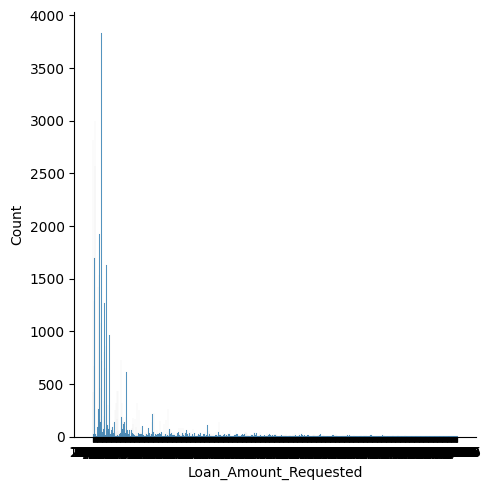

In [35]:
sns.displot(df2["Loan_Amount_Requested"])

In [51]:
# Check for duplicate column names
duplicates = [col for col in df4.columns if df4.columns.duplicated().any()]

# Rename columns with duplicate names
for col in duplicates:
    new_col_name = col + "_renamed"
    df.rename(columns={col: new_col_name}, inplace=True)

In [53]:
display(df4)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Loan_Amount_Requested
7,10000008,"15,000",< 1 year,Rent,115000.0,VERIFIED - income,debt_consolidation,7.97,1,16.0,25,31,Female,2,15000
12,10000013,"7,200",10+ years,Rent,55000.0,VERIFIED - income source,debt_consolidation,31.25,0,68.0,5,16,Male,2,7200
14,10000015,"6,700",10+ years,Mortgage,16000.0,VERIFIED - income source,credit_card,14.70,0,13.0,20,43,Male,2,6700
18,10000019,"25,000",10+ years,Rent,62000.0,VERIFIED - income,credit_card,13.72,0,64.0,6,26,Female,3,25000
20,10000021,"4,000",10+ years,Rent,55000.0,not verified,credit_card,23.04,0,10.0,15,21,Female,1,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164285,10164286,"7,200",6 years,Mortgage,65000.0,not verified,debt_consolidation,8.17,1,27.0,8,28,Female,2,7200
164287,10164288,"25,000",10+ years,Mortgage,66000.0,VERIFIED - income source,debt_consolidation,17.15,0,10.0,15,26,Male,3,25000
164288,10164289,"6,000",2 years,Rent,30000.0,not verified,credit_card,15.84,0,28.0,9,17,Female,2,6000
164300,10164301,"24,000",1 year,Rent,108000.0,VERIFIED - income source,other,14.30,0,22.0,12,36,Female,3,24000


In [55]:
df4.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate', 'Loan_Amount_Requested'],
      dtype='object')

In [57]:
df4.columns = ['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate', 'Loan_Amount_Requested2']

In [153]:
display(df4)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Loan_Amount_Requested2
7,10000008,"15,000",< 1 year,Rent,2.455537,VERIFIED - income,debt_consolidation,7.97,1,16.0,25,31,Female,2,9.615805
12,10000013,"7,200",10+ years,Rent,2.390146,VERIFIED - income source,debt_consolidation,31.25,0,68.0,5,16,Male,2,8.881836
14,10000015,"6,700",10+ years,Mortgage,2.270097,VERIFIED - income source,credit_card,14.70,0,13.0,20,43,Male,2,8.809863
18,10000019,"25,000",10+ years,Rent,2.401062,VERIFIED - income,credit_card,13.72,0,64.0,6,26,Female,3,10.126631
20,10000021,"4,000",10+ years,Rent,2.390146,not verified,credit_card,23.04,0,10.0,15,21,Female,1,8.294050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164285,10164286,"7,200",6 years,Mortgage,2.405335,not verified,debt_consolidation,8.17,1,27.0,8,28,Female,2,8.881836
164287,10164288,"25,000",10+ years,Mortgage,2.406712,VERIFIED - income source,debt_consolidation,17.15,0,10.0,15,26,Male,3,10.126631
164288,10164289,"6,000",2 years,Rent,2.333013,not verified,credit_card,15.84,0,28.0,9,17,Female,2,8.699515
164300,10164301,"24,000",1 year,Rent,2.450133,VERIFIED - income source,other,14.30,0,22.0,12,36,Female,3,10.085809


In [59]:
df4["Loan_Amount_Requested2"] = np.log(df4["Loan_Amount_Requested2"])

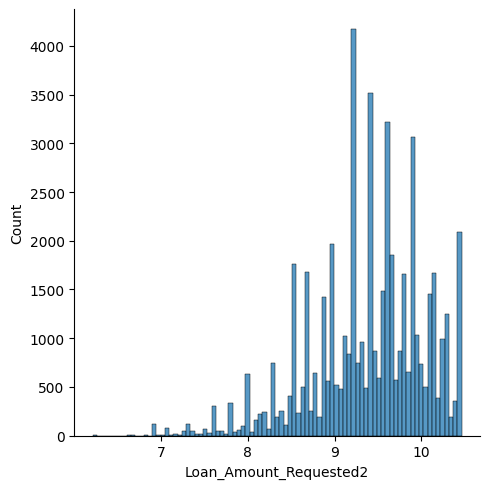

In [61]:
sns.displot(df4['Loan_Amount_Requested2'])

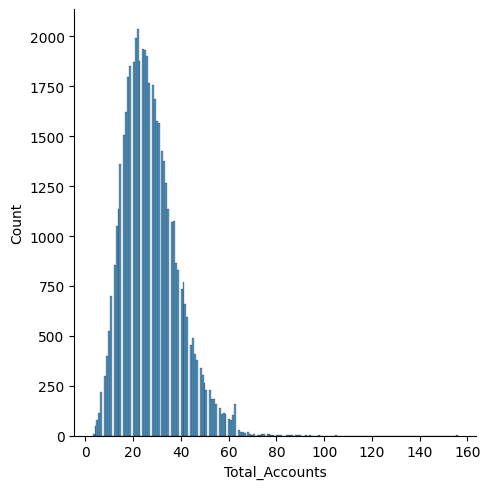

In [67]:
sns.displot(df4['Total_Accounts'])

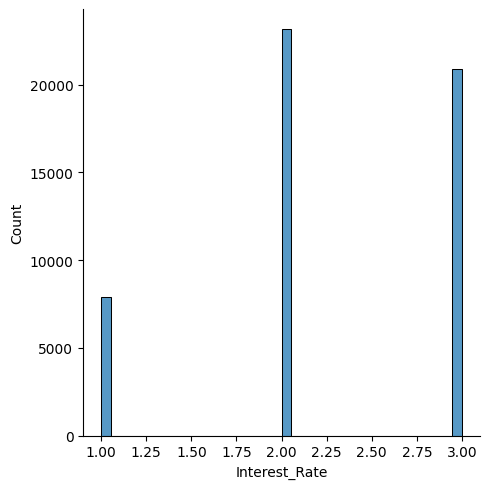

In [68]:
sns.displot(df4['Interest_Rate'])

In [65]:
df4['Gender'] = df4['Gender'].astype(str)

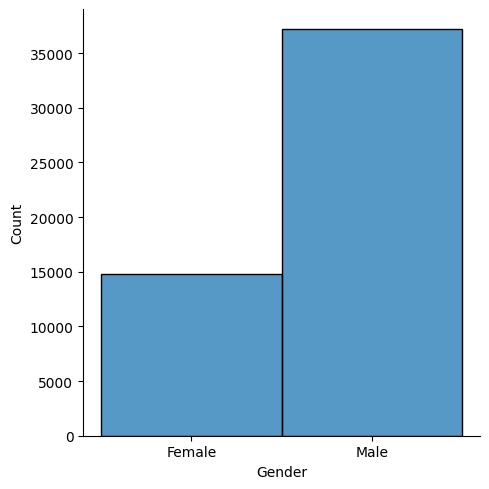

In [69]:
sns.displot(df4['Gender'])

In [71]:
df4['Annual_Income'] = np.log(df4['Annual_Income'])

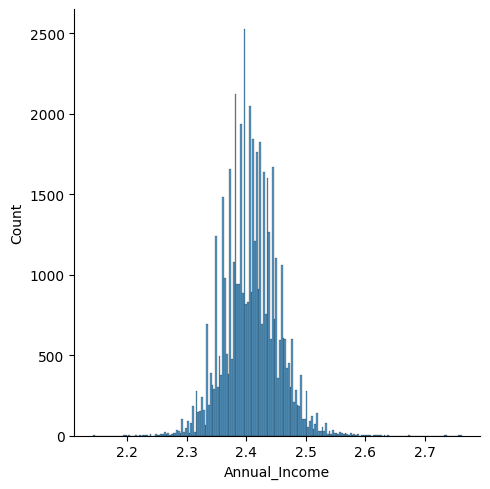

In [72]:
sns.displot(df4['Annual_Income'])

<Figure size 1500x1000 with 0 Axes>

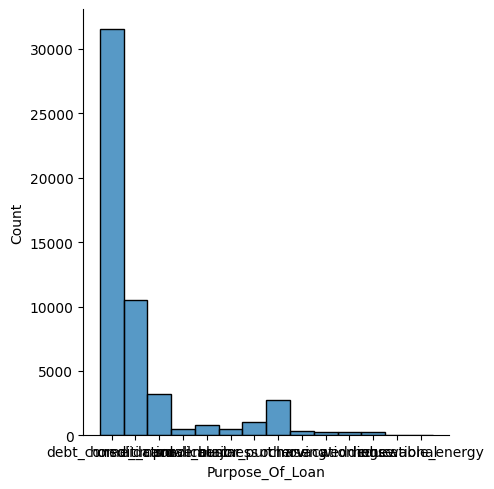

<Figure size 1500x1000 with 0 Axes>

In [77]:
sns.displot(df4['Purpose_Of_Loan'])
plt.figure(figsize=(15,10))

Correlation Matrix

<ipython-input-76-a47073d37132>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df4.corr()


<Axes: >

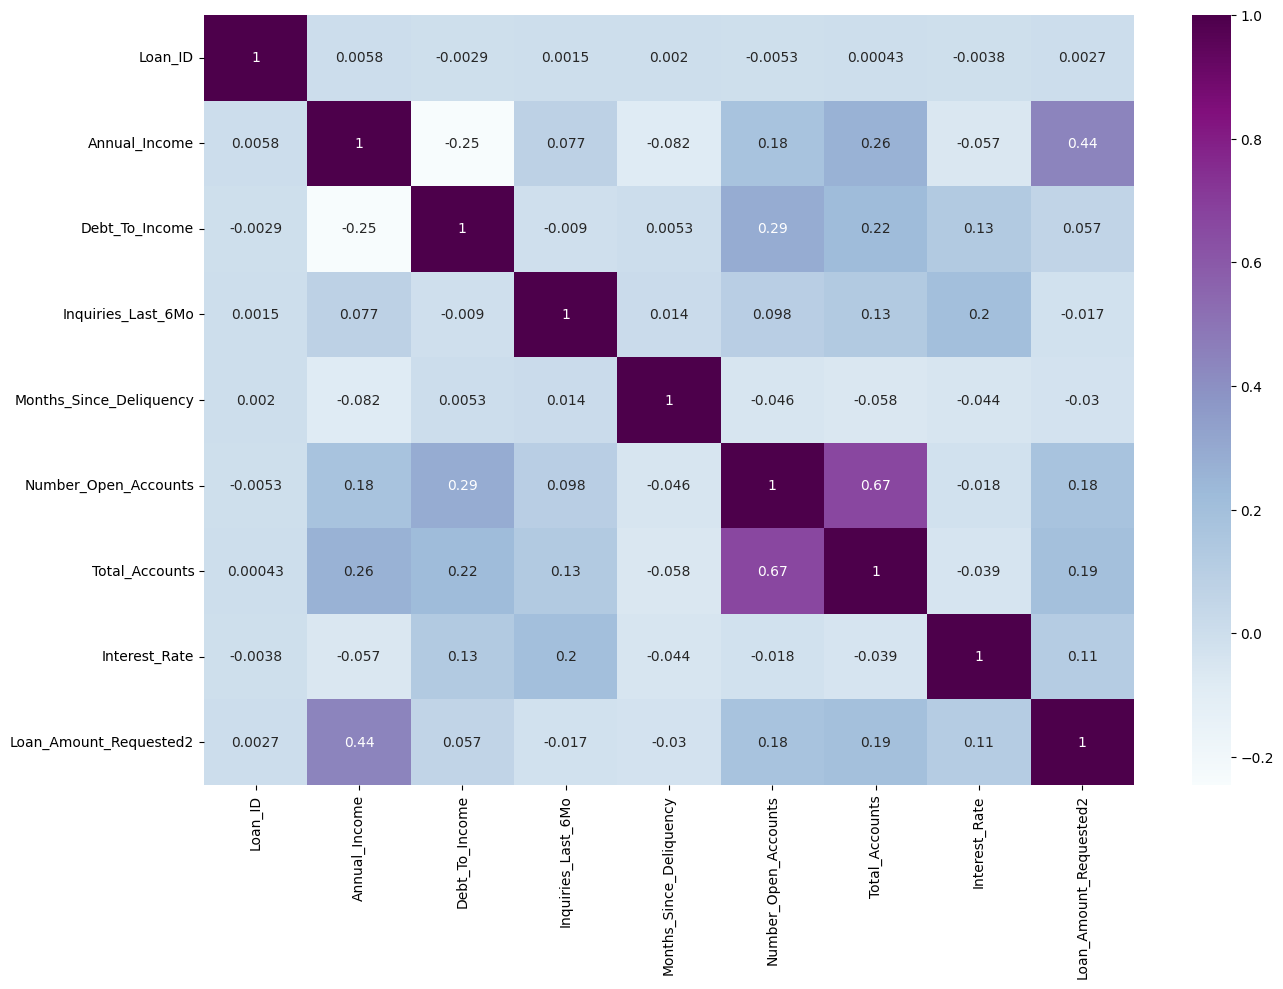

In [76]:
corr = df4.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="BuPu")

Label Encoding

In [93]:
#drop unnecessary columns
cols = ['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner','Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income','Inquiries_Last_6Mo', 'Months_Since_Deliquency']
df6 = df4.drop(columns=cols,axis=1)
df6.head()

,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Loan_Amount_Requested2
7,25,31,Female,2,9.615805
12,5,16,Male,2,8.881836
14,20,43,Male,2,8.809863
18,6,26,Female,3,10.126631
20,15,21,Female,1,8.294050


In [96]:
df6.dtypes

Number_Open_Accounts        int64
Total_Accounts              int64
Gender                     object
Interest_Rate               int64
Loan_Amount_Requested2    float64
dtype: object

In [101]:
df6['Number_Open_Accounts'] = df6['Number_Open_Accounts'].astype(object)

In [102]:
df6['Total_Accounts'] = df6['Total_Accounts'].astype(object)

In [103]:
df6['Interest_Rate'] = df6['Interest_Rate'].astype(object)

In [104]:
df6['Loan_Amount_Requested2'] = df6['Loan_Amount_Requested2'].astype(object)

In [107]:
df6.columns

Index(['Number_Open_Accounts', 'Total_Accounts', 'Gender', 'Interest_Rate',
       'Loan_Amount_Requested2'],
      dtype='object')

In [118]:
df6.columns = ['Number_Open_Accounts','Total_Accounts', 'Gender', 'Interest_Rate', 'Loan_Amount_Requested2']

In [119]:
df6.head()

,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Loan_Amount_Requested2
7,24,28,0,1,554
12,4,13,1,1,244
14,19,40,1,1,224
18,5,23,0,2,934
20,14,18,0,0,117


In [120]:
df6.dtypes

Number_Open_Accounts      int64
Total_Accounts            int64
Gender                    int64
Interest_Rate             int64
Loan_Amount_Requested2    int64
dtype: object

In [123]:
from sklearn.preprocessing import LabelEncoder
cols = ['Number_Open_Accounts',"Total_Accounts","Gender",'Interest_Rate',"Loan_Amount_Requested2"]
le = LabelEncoder()

for col in cols:
    df6[col] = le.fit_transform(df6[col])

In [124]:
df6.head()

,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Loan_Amount_Requested2
7,24,28,0,1,554
12,4,13,1,1,244
14,19,40,1,1,224
18,5,23,0,2,934
20,14,18,0,0,117


In [154]:
display(df6)

,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Loan_Amount_Requested2
7,24,28,0,1,554
12,4,13,1,1,244
14,19,40,1,1,224
18,5,23,0,2,934
20,14,18,0,0,117
...,...,...,...,...,...
164285,7,25,0,1,244
164287,14,23,1,2,934
164288,8,14,0,1,196
164300,11,33,0,2,899


In [155]:
df6.to_csv('final_dataset.csv')

Train Test Split

In [125]:
#specify input and output attributes
X = df6.drop(columns='Interest_Rate',axis=1)
y = df6['Interest_Rate']

In [126]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Model Training

In [128]:
#classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
  x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
  model.fit(x_train, y_train)
  print("Accuracy is",model.score(x_test,y_test)*100)
  #cross validation - it is used for better validation of model
  #eg: cv-5,train-4,test-1
  score = cross_val_score(model,x,y,cv=5)
  print("Cross validation is,",np.mean(score)*100)

In [129]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is 49.30726600985222


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross validation is, 49.52853955574405


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [130]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,X,y)

Accuracy is 41.47937192118227
Cross validation is, 41.67338934872037


In [131]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model,X,y)

Accuracy is 44.19642857142857
Cross validation is, 44.20966614327472


In [133]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model,X,y)

Accuracy is 42.89562807881773
Cross validation is, 43.23787652473493


In [134]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model,X,y)

Accuracy is 51.600985221674875
Cross validation is, 51.564485694873774


Hyperparameter Tuning

In [143]:
model = RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)
classify(model,X,y)

Accuracy is 50.10006157635468
Cross validation is, 49.89993468354251


**Confusion Matrix**

Confusion Matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of error that are being made

In [145]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [147]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 226, 1121,  661],
       [ 631, 3052, 2145],
       [ 419, 2316, 2421]])

<Axes: >

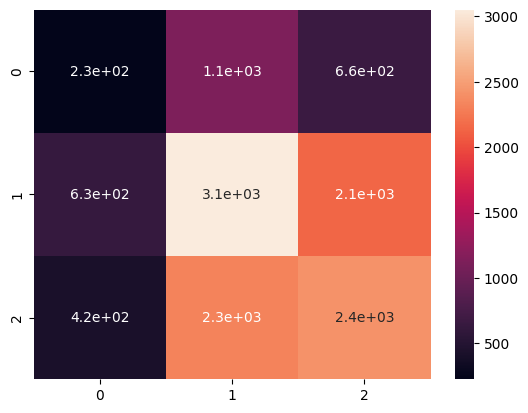

In [151]:
sns.heatmap(cm, annot=True)